# 1. Code to generate Pseudo-random Numbers

In this section we investigate the logistic map from lecture.

In [9]:
# Load the various libraries we'll need
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [10]:
# Add some snazzy functional programming stuff
import functools

## 1.1. The logistic map

In [11]:
# Define a function that does one step of the logistic map
def logisticMap(x,r):
    return r*x*(1.0-x)

In [12]:
# Construct an orbit of the logistic map
nSteps = 100
t = range(0,(nSteps + 1))
r = 3.9
x = np.zeros(nSteps + 1) # initialise the result as a vector of zeroes
x[0] = 0.1 # Choose the initial condition
for i in range(1,(nSteps + 1)):
    x[i] = logisticMap(x[i-1],r)

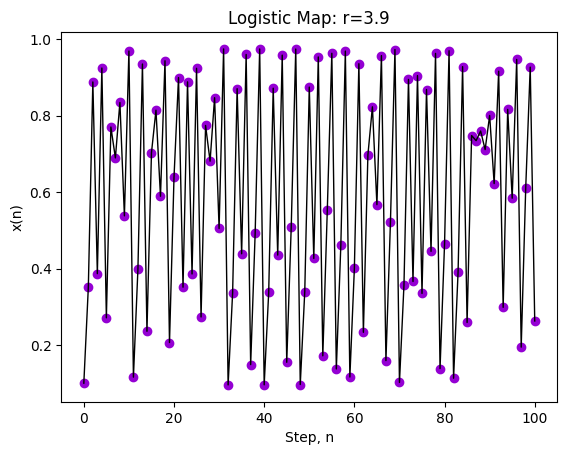

In [13]:
# Plot the results of the previous step
plt.plot(t, x, '-', linewidth=1,color='black')
plt.scatter( t, x, color="darkviolet" ) # add dots at the points
plt.title('Logistic Map: r=' + str(r))
plt.xlabel('Step, n')
plt.ylabel('x(n)')
plt.show()

## 1.2. The system clock

Here we try to use the machine's clock as source of randomness. The strategy is to get the current time, then ask the system to pause briefly, then get the time again. Vagaries of the processor (having to do with other programs and network demands) mean that the wait won't last *exactly* the time we requested and so a certain amount of randomness will be introduced.

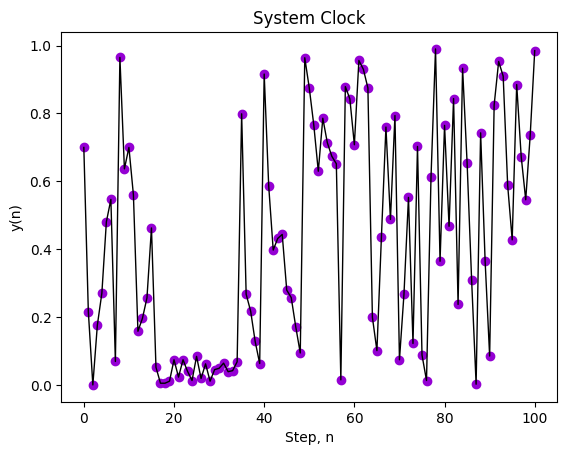

In [14]:
# Repeatedly get the time from the machine's clock,
# then pick off the part of the time record that
# records time in microseconds.
y = np.zeros(1 + nSteps)
for i in range(0,  (1 + nSteps)):
    dt = datetime.now()
    s = str(dt.microsecond) # convert the fractional time in microseconds to a string 
    y[i] = float(s[3:6])/1000 # Chop off the last three digits of the string
    time.sleep(float(s[0:3])/100000) # wait a little while

# Plot the results
plt.plot(t, y, '-', linewidth=1,color='black')
plt.scatter( t, y, color="darkviolet" ) # add dots at the points
plt.title('System Clock')
plt.xlabel('Step, n')
plt.ylabel('y(n)')
plt.show()

# 2. Estimation of π

Suppose we *define* $\pi$ to be the area of a circle
whose radius is 1, and then want to estimate its numerical value. Here we
will use a &ldquo;Monte Carlo&rdquo; method to estimate this number, given its
definition. Consider the plot below&mdash;the quarter circle
coloured in blue will have an area of $\pi / 4$. Our intuition is that if we were
to shoot an automatic paintball gun at this target (an experiment
performed by Prof.&nbsp;D.&nbsp;Spiegelhalter and the BBC) the ratio of
the number of spots inside the quarter-circle to those inside the square would
be close to $\pi/4$.

This suggests the following approach: we will pick random values of $x$
and $y$ independently from a uniform distribution between $0$ and
$1$ (so that the corresponding $(x,y)$ piars are scattered uniformly across the square), then let the random variable $Z$ equal $1$ if the point
$(x,y)$ falls within the quarter-circle shown and $0$ otherwise.
This $Z$ allows us to make an estimate of $\pi$ in that its 
expected value, $\mathbb{E}[Z] = \pi/4$. We can then define a
random variable $A_n$ to be the average of $n$ independent samples
of $Z$. Formally:
$$
	A_n := \frac{1}{n} \sum_{i=1}^{n} Z_i = \frac{\pi}{4} + \varepsilon_n,
$$
where the $Z_i$ are copies of $Z$ and $\varepsilon_n$ is the
*error*. Unfortunately, we won't know what $\varepsilon_n$ *is* for any specific run of the experiment.

To deal with this, we'll repeat the experiment $m$ times and make a list of all the estimates
we get. We'll then arrange these results in ascending order and throw away a certain fraction $\alpha$ of the largest and smallest results. The remaining values should provide decent upper and lower bounds for an interval containing $\pi$.

In [15]:
m = 100 # Number of estimates taken
n = 80000 # Number of points used in each estimate

If we increase $n$ above, we should get a more accurate estimates of $\pi$ each tme we run the experiment, while if we increase $m$, we'll get more accurate estimates of the endpoints of an interval containing $\pi$.

In [16]:
#Generate a set of m estimates of the area of a unit-radius quarter-circle
np.random.seed(42) # Seed the random number generator
A = np.zeros(m) # A will hold our m estimates
for i in range(0,m):
    for j in range(0,n):
        # Generate an (x, y) pair in the unit square
        x = np.random.rand()     #random.rand() -> generate a num in [0,1)
        y = np.random.rand()
        
        # Decide whether the point lies in or on
        # the unit circle and set Z accordingly
        r = x**2 + y**2
        if ( r <= 1.0):
            Z = 1.0
        else:
            Z = 0
            
        # Add up the contribution to the current estimate
        A[i] = A[i] + Z
           
    # Convert the sum we've built to an estimate of pi
    A[i] = 4.0 * A[i] / float( n )

In [17]:
# Calculate approximate 95% confidence interval for pi based on our Monte Carlo estimates
pi_estimates = np.sort(A)
piLower = np.percentile(pi_estimates,2.5)
piUpper = np.percentile(pi_estimates,97.5)
print(f'We estimate that pi lies between {piLower:.3f} and {piUpper:.3f}.')

We estimate that pi lies between 3.131 and 3.151.


# 3. Working with census data

Look at the census data with Excel. The two blocks of code below work by:
 * skipping the first row;
 * extracting the numeric parts (which are ages) from the entries in the second row;
 * associating the counts (of people) in the third row with the ages above them.

In [57]:
# Read the census data
f = open('Data_AGE_UNIT.csv','r')
top_headers = f.readline() # Top row: it gets ignored
header_descriptions = f.readline() # ages
datastring = f.readline() # Numbers of people
f.close()

import pandas as pd
file = pd.read_csv('Data_AGE_UNIT.csv')
file_ = pd.DataFrame(file)
print(file_.head(5))

   CDU_ID   GEO_CODE   GEO_LABEL           GEO_TYPE GEO_TYP2  \
0     NaN        NaN         NaN                NaN      NaN   
1   335.0  E08000003  Manchester  Local Authorities       LA   

                             F52                            F53  \
0  Age : Age 47 - Unit : Persons  Age : Age 48 - Unit : Persons   
1                           5695                           5550   

                             F54                            F55  \
0  Age : Age 49 - Unit : Persons  Age : Age 50 - Unit : Persons   
1                           5442                           5163   

                             F56  ...                           F874  \
0  Age : Age 51 - Unit : Persons  ...  Age : Age 38 - Unit : Persons   
1                           4879  ...                           6635   

                            F875                           F876  \
0  Age : Age 39 - Unit : Persons  Age : Age 40 - Unit : Persons   
1                           6644                    

The block of code below scans through the census data and counts the number of people at a given age.

In [60]:
# The data are unordered, so process them to yield a vector ageCounts whose j-th entry is the 
# number of people who are j years old.
import re
datafields = datastring.split(',')
fields = header_descriptions.split(',')

'''print(datafields)
print(fields)
'''
maxAge = 100
ageCounts = np.zeros(maxAge + 1)
i = 0
for ff in fields:
    z = re.search(r'\d{1,3}',ff)
    if z:
        ageCounts[int(z.group(0))] = int(datafields[i])
    i += 1

print(ageCounts)
print(ageCounts[47])

[ 7660.  7518.  7211.  7213.  6811.  6437.  6047.  5575.  5361.  5197.
  5244.  5291.  5343.  5391.  5516.  5603.  5222.  5512.  8277. 13688.
 15987. 14929. 13369. 11777. 10936. 11933. 11573. 11329. 11046. 10714.
 10338.  9946.  8982.  8155.  7583.  7078.  6947.  6666.  6635.  6644.
  6615.  6453.  6622.  6359.  6417.  5940.  6010.  5695.  5550.  5442.
  5163.  4879.  4591.  4745.  4549.  4091.  4077.  3810.  3943.  3712.
  3729.  3590.  3518.  3813.  3586.  2689.  2835.  2710.  2563.  2394.
  2437.  2317.  2268.  2335.  2219.  2073.  1942.  1813.  1793.  1757.
  1554.  1536.  1432.  1253.  1251.  1079.   939.   857.   705.   646.
   603.   483.   254.   236.   147.   128.    95.    79.    34.    32.
    56.]
5695.0


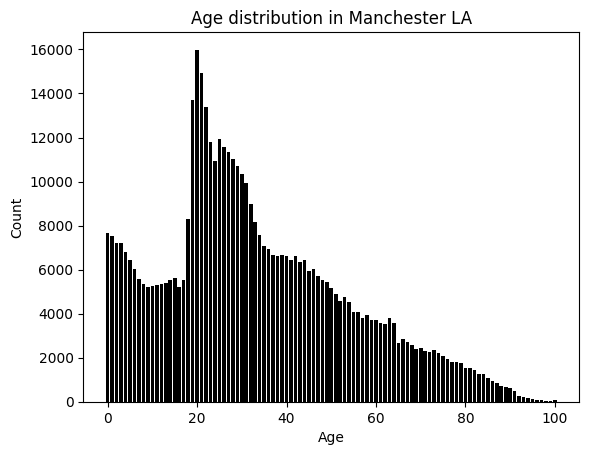

In [40]:
# Make a histogram of the age distribution
plt.bar(np.arange(0, (maxAge + 1)),ageCounts,color=[0, 0, 0])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution in Manchester LA')
plt.show()

### 3.1 Drawing a single bootstrap sample from a batch of census data

The census data consist of a vector whose *j*-th entry is the number of people who are *j* years old. We begin by converting this into a list of ages-of-people.

In [41]:
# Get the whole population
totalPopulation = int(sum(ageCounts))
print(totalPopulation)

503127


In [42]:
# Build a vector of ages with one entry per person
listOfAges = np.zeros( totalPopulation )

personNum = 0
for age in range(0,maxAge+1):
    for k in range(0, int(ageCounts[age])):
        listOfAges[personNum] = age
        personNum += 1

Use Numpy's built-in histogram-making function to check that the list we've just built has the same age counts as the original data. This is a bug-catching step, rather than a part of the main computation.

In [62]:
print(ageCounts)

ageHistogramBinEdges = np.linspace(0, (maxAge+1), num=(maxAge+2))
crntHist, crntBinEdges = np.histogram(listOfAges, bins=ageHistogramBinEdges)

print(crntHist)

crntHist - ageCounts # Should yield a list of 101 zeros.

[ 7660.  7518.  7211.  7213.  6811.  6437.  6047.  5575.  5361.  5197.
  5244.  5291.  5343.  5391.  5516.  5603.  5222.  5512.  8277. 13688.
 15987. 14929. 13369. 11777. 10936. 11933. 11573. 11329. 11046. 10714.
 10338.  9946.  8982.  8155.  7583.  7078.  6947.  6666.  6635.  6644.
  6615.  6453.  6622.  6359.  6417.  5940.  6010.  5695.  5550.  5442.
  5163.  4879.  4591.  4745.  4549.  4091.  4077.  3810.  3943.  3712.
  3729.  3590.  3518.  3813.  3586.  2689.  2835.  2710.  2563.  2394.
  2437.  2317.  2268.  2335.  2219.  2073.  1942.  1813.  1793.  1757.
  1554.  1536.  1432.  1253.  1251.  1079.   939.   857.   705.   646.
   603.   483.   254.   236.   147.   128.    95.    79.    34.    32.
    56.]
[ 7660  7518  7211  7213  6811  6437  6047  5575  5361  5197  5244  5291
  5343  5391  5516  5603  5222  5512  8277 13688 15987 14929 13369 11777
 10936 11933 11573 11329 11046 10714 10338  9946  8982  8155  7583  7078
  6947  6666  6635  6644  6615  6453  6622  6359  6417  5940  

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 3.2 Using bootstrap samples to construct 95% confidence bands around the histogram

Do the bootstrapping: construct a matrix with nSamples rows and (maxAge + 1) columns. The (j,k) entry is the number of people in the *j*-th sample who had age *k*. We also keep track of how long it all takes.

In [44]:
nSamples = 1000
sampleSize = totalPopulation
bootstrapMat = np.zeros( (nSamples, maxAge+1) )

startDt = datetime.now() # Note the time when we start
for sampleNum in range(0, nSamples):
    # Draw a sample with replacement
    crntSample = np.random.choice(listOfAges, size=totalPopulation, replace=True )
    
    # Use np.histogram() to count up the number of people with a given age
    crntHist, crntBinEdges = np.histogram(crntSample, bins=ageHistogramBinEdges)
    
    # Record the result
    bootstrapMat[sampleNum,:] = crntHist
    
stopDt = datetime.now() # Note the time when we stop
choiceElapsed = stopDt - startDt # Work out how long the computation took 
print( choiceElapsed.seconds + choiceElapsed.microseconds/1000000, " seconds" )

19.363953  seconds


Now get ready to find 95% confidence bands for each of the columns

In [45]:
# Define a function to extract the desired summary stats from each column
def summariseSample(x, conf=95):
    alpha = 100 - conf
    lower = np.percentile(x, alpha/2)
    median = np.median(x)
    upper = np.percentile(x, 100 - alpha/2)
    return( lower, median, upper )

In [46]:
# Apply the function to each column of the booststrap matrix
myConf = 95 # a percentage
confBandMat = np.zeros((3, maxAge+1))
for age in range(0, (maxAge + 1)):
    lower, median, upper = summariseSample(bootstrapMat[:,age], myConf )
    confBandMat[0,age] = lower
    confBandMat[1,age] = median
    confBandMat[2,age] = upper

As above, do a debugging step and check that the output of our function looks sane when applied to the first few columns of the bootstrapped data

In [47]:
# Check that the output looks sane
confBandMat[:,0:5]

array([[7490.975, 7343.975, 7061.975, 7043.975, 6655.775],
       [7661.5  , 7512.   , 7210.   , 7212.   , 6812.   ],
       [7827.025, 7678.05 , 7371.025, 7386.1  , 6982.15 ]])

In [48]:
# For comparison, here are the original age counts
ageCounts[0:5]

array([7660., 7518., 7211., 7213., 6811.])

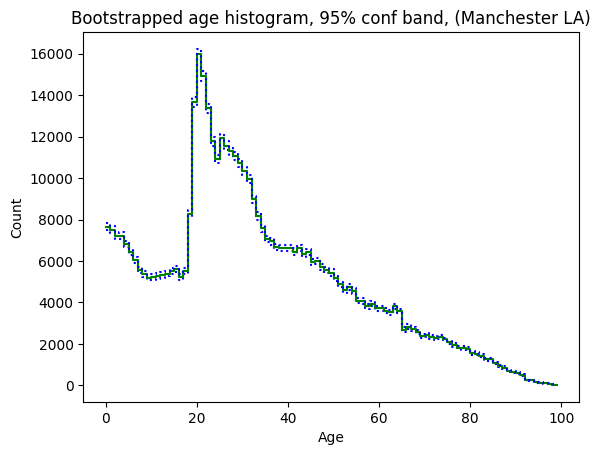

In [49]:
# Plot the median and 95% confidence bands (dotted, black) around the origianl histogram (solid, blue)
minAge = 0 
maxAge = 100
plt.step(ageHistogramBinEdges[minAge:maxAge], confBandMat[0,minAge:maxAge], color='b', where='post', linestyle="dotted")
plt.step(ageHistogramBinEdges[minAge:maxAge], ageCounts[minAge:maxAge], color='g', where='post', linestyle="solid")
plt.step(ageHistogramBinEdges[minAge:maxAge], confBandMat[2,minAge:maxAge], color='b', where='post', linestyle="dotted")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bootstrapped age histogram, ' + str(myConf) + '% conf band, (Manchester LA)')
plt.show()

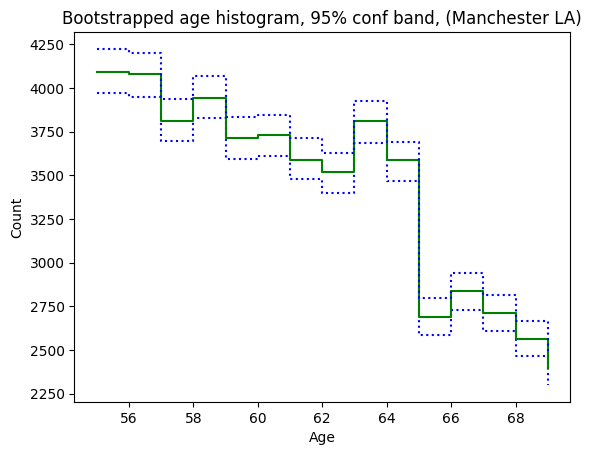

In [50]:
# Now show a detail around the apparent local maximum near 65
minAge = 55 
maxAge = 70
plt.step(ageHistogramBinEdges[minAge:maxAge], confBandMat[0,minAge:maxAge], color='b', where='post', linestyle="dotted")
plt.step(ageHistogramBinEdges[minAge:maxAge], ageCounts[minAge:maxAge], color='g', where='post', linestyle="solid")
plt.step(ageHistogramBinEdges[minAge:maxAge], confBandMat[2,minAge:maxAge], color='b', where='post', linestyle="dotted")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bootstrapped age histogram, ' + str(myConf) + '% conf band, (Manchester LA)')
plt.show()

### 3.3 An alternative, faster way to draw the samples

We can also generate samples by drawing them from the multinomial distribution where we use the census data to estimate the probability of getting a person with age $y$ years by $P(y)$ = `ageCounts[y]/totalPopulation`

In [51]:
# Attempt stylish multinomial thing: first construct the probabilities, checking that they sum to one
probs = ageCounts / totalPopulation
sum(probs)

0.9999999999999999

In [52]:
# Now get a single multinomial sample and check that it looks sane.
crntHist = np.random.multinomial(totalPopulation, probs)
crntHist

array([ 7713,  7434,  7066,  7254,  6809,  6424,  6036,  5599,  5448,
        5339,  5247,  5301,  5321,  5336,  5430,  5572,  5318,  5419,
        8368, 13644, 15904, 14998, 13249, 11745, 10971, 11848, 11616,
       11404, 11057, 10761, 10354,  9864,  8931,  8252,  7631,  6986,
        6990,  6516,  6655,  6666,  6651,  6233,  6564,  6316,  6452,
        6016,  6170,  5657,  5594,  5498,  5239,  4838,  4589,  4695,
        4564,  4044,  4109,  3873,  4027,  3730,  3694,  3494,  3554,
        3887,  3598,  2753,  2792,  2671,  2589,  2408,  2422,  2355,
        2272,  2288,  2242,  2055,  1937,  1825,  1766,  1676,  1526,
        1569,  1424,  1265,  1268,  1078,   951,   860,   720,   701,
         612,   486,   252,   223,   138,   136,    95,    79,    34,
          38,    59])

In [53]:
# Finally, repeat the bootstrapping
maxAge = 100
multinomialBootstrapMat = np.zeros((nSamples, (maxAge + 1)))

startDt = datetime.now() # Note the time when we start
for sampleNum in range(0, nSamples):
    # Draw the sample
    crntSample = np.random.multinomial(totalPopulation, probs)
    
    # Use np.histogram() to count up the number of people with a given age
    crntHist, crntBinEdges = np.histogram(crntSample, bins=ageHistogramBinEdges)
    
    # Record the result
    multinomialBootstrapMat[sampleNum,:] = crntHist

stopDt = datetime.now() # Note the time when we stop
multinomElapsed = stopDt - startDt  # Work out how long the computation took 
print( multinomElapsed.seconds + multinomElapsed.microseconds/1000000, " seconds" )

0.016083  seconds


In [54]:
# Get the ratio of speeds for the two approaches to sampling
choiceElapsed / multinomElapsed

1204.0013057265435